In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [13]:
# Function to compute the sigmoid of a value
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to generate labels based on the sigmoid function
def gen_label(x_i, w_star):
    probability = sigmoid(np.dot(w_star, x_i))
    return 1 if np.random.uniform(0, 1) <= probability else 0

# Function to return the true w as well as X, Y data
def generate_data(m):
    # Step 1: Generate the weight vector w_star
    w = np.random.normal(0, 1, 10)
    
    # Normalize w_star so its Euclidean norm is 1, using equation from handout
    euclidean_norm = np.sqrt(np.sum(w ** 2))
    w_norm = w / euclidean_norm

    # Step 2: Generate the training set
    X = np.random.normal(0, 1, (m, 10))  # m vectors, each of dimension 10
    Y = np.array([gen_label(x_i, w_norm) for x_i in X])
    
    return w, X, Y

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [20]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
def logistic_regression_model(m):
    # Generate data
    w_star, X, Y = generate_data(m)

    # Fit logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X, Y)

    # Get the learned weight vector
    w_learned = model.coef_.flatten()  # Flatten to get a 1D array
    
    return w_star, w_learned

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [19]:
# Gradient descent function for square loss
def gradient_descent(X, Y, learning_rate=0.01, max_iter=1000):
    m, n = X.shape
    w = np.random.normal(0, 1, n)  # Initialize weights randomly

    # Gradient descent loop
    for iteration in range(max_iter):
        gradient = np.zeros(n)  # Initialize gradient vector

        # Calculate the gradient for all points in the training set
        for x_i, y_i in zip(X, Y):
            prediction = sigmoid(np.dot(w, x_i))  # σ(w'·x)
            error = prediction - y_i  # σ(w'·x) − y
            # Gradient update for square loss: (σ(w'·x) - y) * σ(w'·x) * (1 - σ(w'·x)) * x_i
            gradient += error * prediction * (1 - prediction) * x_i

        gradient /= m  # Average gradient over all points
        w -= learning_rate * gradient  # Update weights using the gradient

    return w

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [18]:
# Stochastic gradient descent for square loss
def stochastic_gradient_descent(X, Y, learning_rate=0.01, max_iter=1000):
    m, n = X.shape
    w = np.random.normal(0, 1, n)  # Initialize weights randomly

    # Stochastic gradient descent loop
    for iteration in range(max_iter):
        # Select one random training example
        idx = np.random.randint(0, m)
        x_i = X[idx]
        y_i = Y[idx]
        
        # Compute prediction and error
        prediction = sigmoid(np.dot(w, x_i))  # σ(w'·x)
        error = prediction - y_i  # σ(w'·x) − y
        
        # Update gradient for square loss
        gradient = error * prediction * (1 - prediction) * x_i
        
        # Update weights using the gradient
        w -= learning_rate * gradient
    
    return w

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

Logistic Regression: Finished m = 50
Logistic Regression: Finished m = 100
Logistic Regression: Finished m = 150
Logistic Regression: Finished m = 200
Logistic Regression: Finished m = 250
Gradient Descent: Finished m = 50
Gradient Descent: Finished m = 100
Gradient Descent: Finished m = 150
Gradient Descent: Finished m = 200
Gradient Descent: Finished m = 250
Stochastic Gradient Descent: Finished m = 50
Stochastic Gradient Descent: Finished m = 100
Stochastic Gradient Descent: Finished m = 150
Stochastic Gradient Descent: Finished m = 200
Stochastic Gradient Descent: Finished m = 250


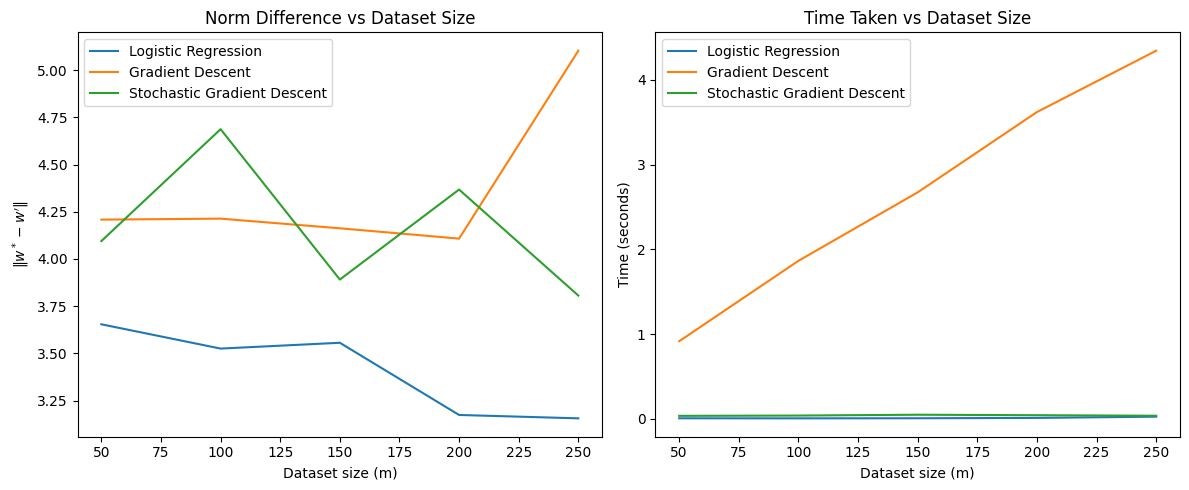

In [22]:
def compute_difference(w_star, w_learned):
    """Compute Euclidean norm (L2 distance) between true and learned weights."""
    return np.linalg.norm(w_star - w_learned)

def run_experiment(m_values, algorithm_func, algorithm_name, num_trials=10):
    """Run the experiment for different dataset sizes and return average norm differences and times."""
    avg_diff = []
    avg_time = []

    for m in m_values:
        total_diff = 0
        total_time = 0

        for _ in range(num_trials):
            # Generate fresh data
            w_star, X, Y = generate_data(m)

            # Time the algorithm execution
            start_time = time.time()

            # Run the algorithm to obtain w'
            if algorithm_func == logistic_regression_model:
                _, w_learned = algorithm_func(m)
            else:
                w_learned = algorithm_func(X, Y)

            # Measure time taken
            total_time += (time.time() - start_time)

            # Compute Euclidean norm ∥w∗ −w′∥
            diff = compute_difference(w_star, w_learned)
            total_diff += diff

        # Average the results for this m value
        avg_diff.append(total_diff / num_trials)
        avg_time.append(total_time / num_trials)

        print(f"{algorithm_name}: Finished m = {m}")

    return avg_diff, avg_time

def plot_results(m_values, results, times, algorithm_names):
    """Plot the norm differences and time taken for each algorithm."""
    plt.figure(figsize=(12, 5))

    # Plot differences
    plt.subplot(1, 2, 1)
    for result, name in zip(results, algorithm_names):
        plt.plot(m_values, result, label=f'{name}')
    plt.xlabel('Dataset size (m)')
    plt.ylabel(r'$\|w^* - w^\prime \|$')
    plt.title('Norm Difference vs Dataset Size')
    plt.legend()

    # Plot times
    plt.subplot(1, 2, 2)
    for time_taken, name in zip(times, algorithm_names):
        plt.plot(m_values, time_taken, label=f'{name}')
    plt.xlabel('Dataset size (m)')
    plt.ylabel('Time (seconds)')
    plt.title('Time Taken vs Dataset Size')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main execution
m_values = [50, 100, 150, 200, 250]
num_trials = 10

# Run experiments for all algorithms
logistic_diff, logistic_time = run_experiment(m_values, logistic_regression_model, 'Logistic Regression', num_trials)
gd_diff, gd_time = run_experiment(m_values, gradient_descent, 'Gradient Descent', num_trials)
sgd_diff, sgd_time = run_experiment(m_values, stochastic_gradient_descent, 'Stochastic Gradient Descent', num_trials)

# Plot the results
plot_results(m_values, [logistic_diff, gd_diff, sgd_diff], [logistic_time, gd_time, sgd_time], 
             ['Logistic Regression', 'Gradient Descent', 'Stochastic Gradient Descent'])

# Problem 2

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

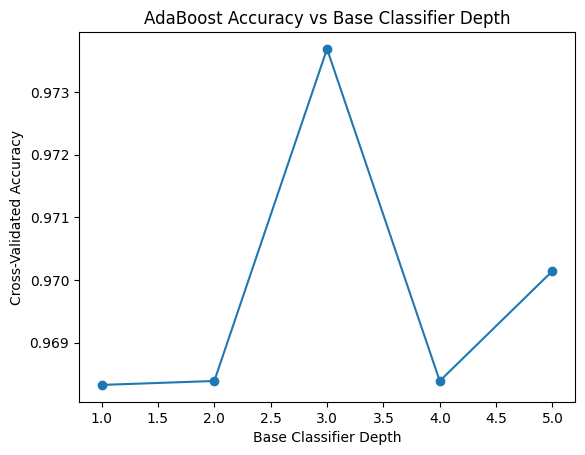

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Define depths to test
depths = [1, 2, 3, 4, 5]
accuracy_scores = []

# Loop over each depth
for depth in depths:
    # Set the base estimator to be a decision tree of a given depth
    base_estimator = DecisionTreeClassifier(max_depth=depth)
    
    # Create the AdaBoost classifier
    clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42, algorithm="SAMME")
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    
    # Record the mean accuracy
    accuracy_scores.append(np.mean(scores))

# Plot the accuracy scores
plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel('Base Classifier Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.title('AdaBoost Accuracy vs Base Classifier Depth')
plt.show()